## Install/import required libraries

In [ ]:
# !pip install diffusers transformers accelerate safetensors

make sure you have GPU access!

In [1]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0))

from diffusers import DiffusionPipeline


True
NVIDIA L4


#### If necessary, update with working huggingface write token

Go to huggingface.com/your_username -> settings -> access tokens -> create new token with WRITE permissions


In [ ]:
# !huggingface-cli login


## Generating an image with NARW LoRA: example

In [ ]:
# !pip install -q transformers accelerate peft diffusers
from diffusers import DiffusionPipeline
import torch

pipe_id = "stabilityai/stable-diffusion-xl-base-1.0"
pipe = DiffusionPipeline.from_pretrained(pipe_id, torch_dtype=torch.bfloat16).to("cuda")

pipe.load_lora_weights("henrysun9074/north-atlantic-right-whale-lora-mk-1", weight_name="north-atlantic-right-whale-lora-mk-1.safetensors", adapter_name="narw")
from diffusers import DPMSolverMultistepScheduler
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe.enable_attention_slicing()

prompt = "A drone photo of a north atlantic right whale swimming in the ocean"

lora_scale = 0.9
image = pipe(
    prompt, num_inference_steps=30, cross_attention_kwargs={"scale": lora_scale}, generator=torch.manual_seed(0)
).images[0]
image



# Below: pipeline setup

(only run one depending on whether you're using DreamBooth or LoRA, comment out the other. the distinction is that dreambooth retrains the entire base model so you have to load in a wholly new model. LoRA takes a base model like SD1.0XL which you load in and then you specify the LoRA on top of that)

#### Pipeline setup for DreamBooth

In [ ]:
# from diffusers import DiffusionPipeline, DPMSolverMultistepScheduler
# import torch

# pipe = DiffusionPipeline.from_pretrained("henrysun9074/dreambooth-out", torch_dtype=torch.bfloat16).to("cuda")
# pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
# pipe.enable_attention_slicing()
# prompt = "a drone image of a humpback whale"

# image = pipe(prompt).images[0]
# image

#### Pipeline setup for LoRA

In [2]:
from diffusers import DiffusionPipeline, DPMSolverMultistepScheduler
import torch
import os
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"

# Initialize pipeline
pipe_id = "stabilityai/stable-diffusion-xl-base-1.0"
pipe = DiffusionPipeline.from_pretrained(pipe_id, torch_dtype=torch.bfloat16).to("cuda")
pipe.load_lora_weights("henrysun9074/drone-humpback-whale-lora-1", weight_name="drone-humpback-whale-lora-1.safetensors", adapter_name="humpback")
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe.enable_attention_slicing()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.78G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/10.3G [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

drone-humpback-whale-lora-1.safetensors:   0%|          | 0.00/93.1M [00:00<?, ?B/s]

## Batch generation:  
Adjust total_images, num_inference_steps and batch_size and prompts as needed. Changing to a constant seed offset ensures reproducibility

Num_inference_steps is the amount of steps the model takes to go from a noised representation to a novel image output. Increasing this can increase generation quality but also jacks up the runtime.

In [8]:
import random
prompt = "A drone photo of a humpback whale swimming in the ocean"

def get_inputs(batch_size, seed_offset):
    generator = [torch.Generator("cuda").manual_seed(seed_offset + i) for i in range(batch_size)]
    # generator = torch.Generator(device="cuda")
    prompts = batch_size * [prompt]
    num_inference_steps = 10
    return {"prompt": prompts, "generator": generator, "num_inference_steps": num_inference_steps}

# Generate images in multiple batches
def generate_images(pipe, total_images, batch_size):
    all_images = []
    seed_offset = random.randint(0, 1_000_000) # For unique seeds across batches

    for _ in range(total_images // batch_size):
        inputs = get_inputs(batch_size, seed_offset)
        images = pipe(**inputs).images
        all_images.extend(images)

        # Free GPU memory
        torch.cuda.empty_cache()

        seed_offset += batch_size

    return all_images

total_images = 256
batch_size = 8
images = generate_images(pipe, total_images, batch_size)


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

## Display images in a grid  


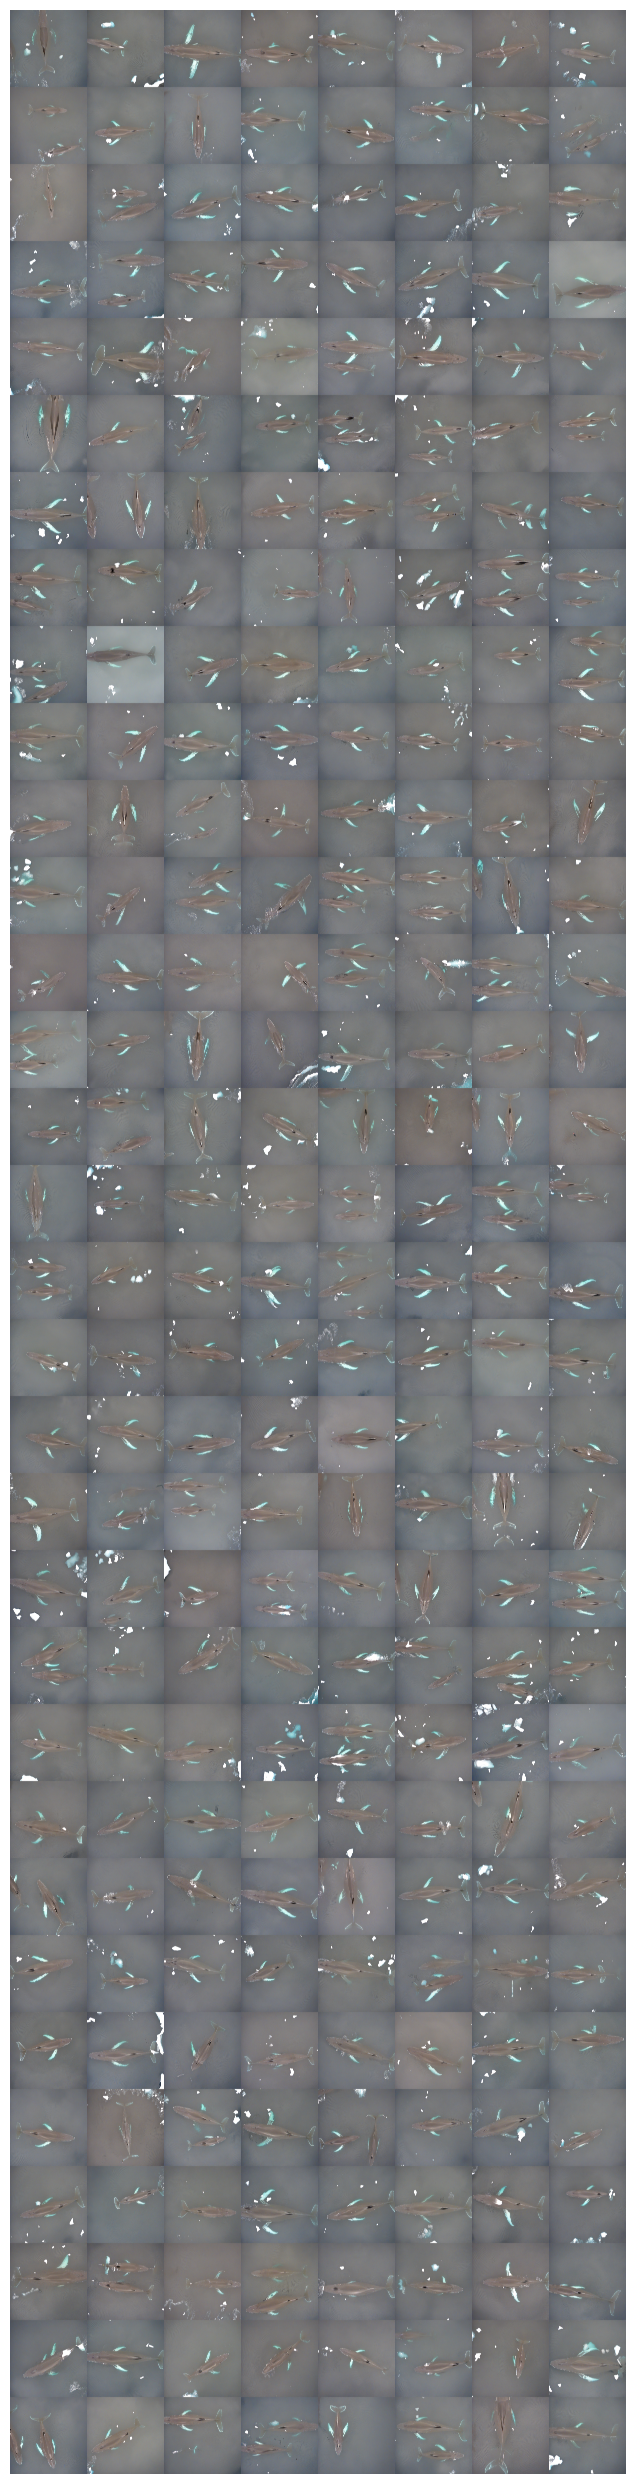

In [9]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

def make_image_grid(images, rows, cols, scale_factor=2):
    # Resize images
    resized_images = [img.resize((img.width * scale_factor, img.height * scale_factor)) for img in images]

    img_width, img_height = resized_images[0].size
    grid_width = cols * img_width
    grid_height = rows * img_height

    # Create grid image
    grid = Image.new("RGB", (grid_width, grid_height))
    for i, img in enumerate(resized_images):
        grid.paste(img, box=(i % cols * img_width, i // cols * img_height))

    plt.figure(figsize=(cols, rows))
    plt.imshow(np.asarray(grid))
    plt.axis("off")
    plt.show()

dim = int(total_images/batch_size)
make_image_grid(images, dim, batch_size, scale_factor=2)  # Adjust scale_factor as needed


## Download Images   
Note: designed for Colab, modify with os to work with local machine

In [10]:
import os
from PIL import Image
import zipfile
from google.colab import files

# Create a folder to store images
output_folder = "generated_images"
os.makedirs(output_folder, exist_ok=True)

# Save images
for idx, img in enumerate(images):
    img_path = os.path.join(output_folder, f"image_{idx + 1}.png")
    img.save(img_path)

# Compress images into a zip file
zip_path = f"{output_folder}.zip"
with zipfile.ZipFile(zip_path, "w") as zipf:
    for root, _, files in os.walk(output_folder):
        for file in files:
            zipf.write(os.path.join(root, file), arcname=file)

# Download the zip file
from google.colab import files
files.download(zip_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>